In [1]:
!unzip "source.zip" -d "/content"

Archive:  source.zip
  inflating: /content/python_stat_sample-master/.gitignore  
   creating: /content/python_stat_sample-master/.ipynb_checkpoints/
   creating: /content/python_stat_sample-master/animation/
   creating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/
  inflating: /content/python_stat_sample-master/animation/.ipynb_checkpoints/chap02_anim-checkpoint.ipynb  
   creating: /content/python_stat_sample-master/animation/__pycache__/
  inflating: /content/python_stat_sample-master/animation/__pycache__/plot_util.cpython-37.pyc  
  inflating: /content/python_stat_sample-master/animation/chap02_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap03_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap04_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap06_anim.ipynb  
  inflating: /content/python_stat_sample-master/animation/chap08_anim.ipynb  
  inflating: /content/python_stat_sample-master

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [3]:
x_set=np.array([1,2,3,4,5,6])

In [4]:
def f(x):
  if x in x_set:
    return x/21
  else:
    return 0

In [5]:
X=[x_set,f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [6]:
prob=np.array([f(x_k) for x_k in x_set])
dic=dict(zip(x_set,prob))
print(dic)

{np.int64(1): np.float64(0.047619047619047616), np.int64(2): np.float64(0.09523809523809523), np.int64(3): np.float64(0.14285714285714285), np.int64(4): np.float64(0.19047619047619047), np.int64(5): np.float64(0.23809523809523808), np.int64(6): np.float64(0.2857142857142857)}


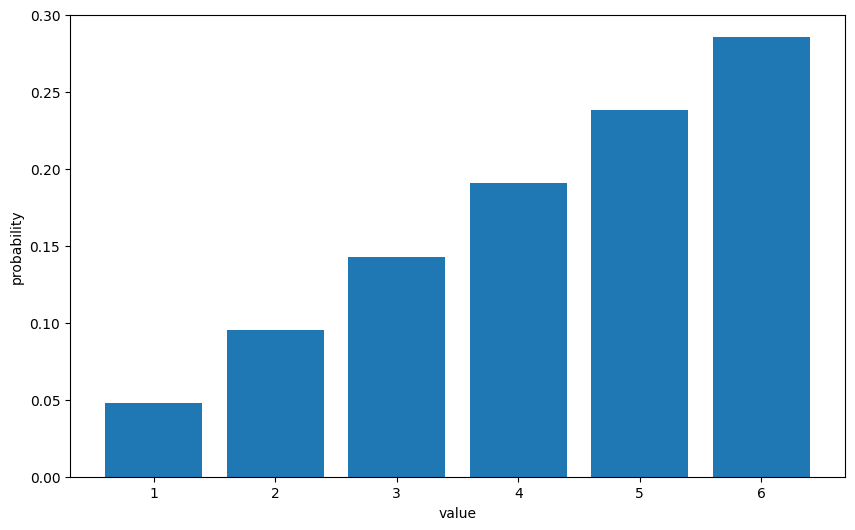

In [7]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel("value")
ax.set_ylabel("probability")

plt.show()

In [8]:
print(np.all(prob>=0))

True


In [9]:
print(np.sum(prob))

0.9999999999999999


In [10]:
def F(x):
  return np.sum([f(x_k) for x_k in x_set \
                            if x_k <=x])

In [11]:
print(F(3))

0.2857142857142857


In [12]:
y_set=np.array([2*x_k +3 for x_k in x_set])
prob=np.array([f(x_k) for x_k in x_set])
dic=dict(zip(y_set,prob))
print(dic)

{np.int64(5): np.float64(0.047619047619047616), np.int64(7): np.float64(0.09523809523809523), np.int64(9): np.float64(0.14285714285714285), np.int64(11): np.float64(0.19047619047619047), np.int64(13): np.float64(0.23809523809523808), np.int64(15): np.float64(0.2857142857142857)}


In [13]:
print(np.sum([x_k*f(x_k) for x_k in x_set]))

4.333333333333333


In [14]:
sample=np.random.choice(x_set,int(1e6),p=prob)
print(np.mean(sample))

4.333387


In [15]:
def E(X, g=lambda x:x):
  x_set, f=X
  return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [16]:
print(E(X))

4.333333333333333


In [17]:
print(E(X,g=lambda x:2*x+3))

11.666666666666664


In [18]:
print(2*E(X)+3)

11.666666666666666


In [19]:
mean=E(X)
print(np.sum([(x_k-mean)**2 *f(x_k) for x_k in x_set]))

2.2222222222222223


In [20]:
mean=E(X)
print(np.sum([(x_k-mean)**2*f(x_k) for x_k in x_set]))

2.2222222222222223


In [59]:
def V(X, g=lambda x:x):
  x_set, f=X
  mean=E(X,g)
  return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

In [22]:
print(V(X))

2.2222222222222223


In [23]:
print(V(X,lambda x: 2*x+3))

8.88888888888889


In [24]:
2**2*V(X)

np.float64(8.88888888888889)

In [25]:
x_set=np.arange(2,13)
y_set=np.arange(1,7)

In [26]:
def f_XY(x,y):
  if 1<=y <=6 and 1<=x-y<=6:
    return y*(x-y)/441
  else:
    return 0

In [27]:
XY=[x_set,y_set,f_XY]

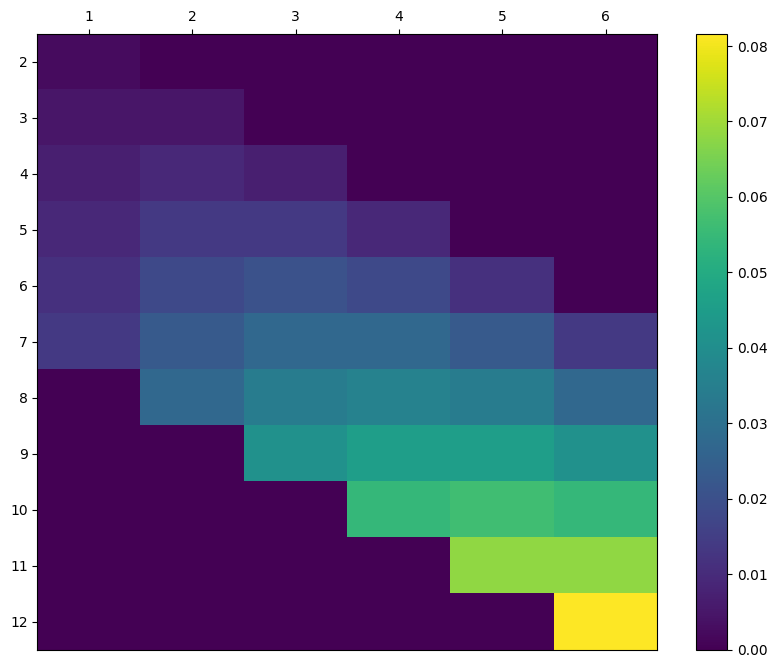

In [29]:
prob=np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig =plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

c=ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [31]:
print(np.all(prob>=0))

True


In [32]:
print(np.sum(prob))

1.0


In [33]:
def f_X(x):
  return np.sum([f_XY(x,y_k) for y_k in y_set])

In [34]:
def f_Y(y):
  return np.sum([f_XY(x_k,y) for x_k in x_set])

In [35]:
X=[x_set,f_X]
y=[y_set,f_Y]

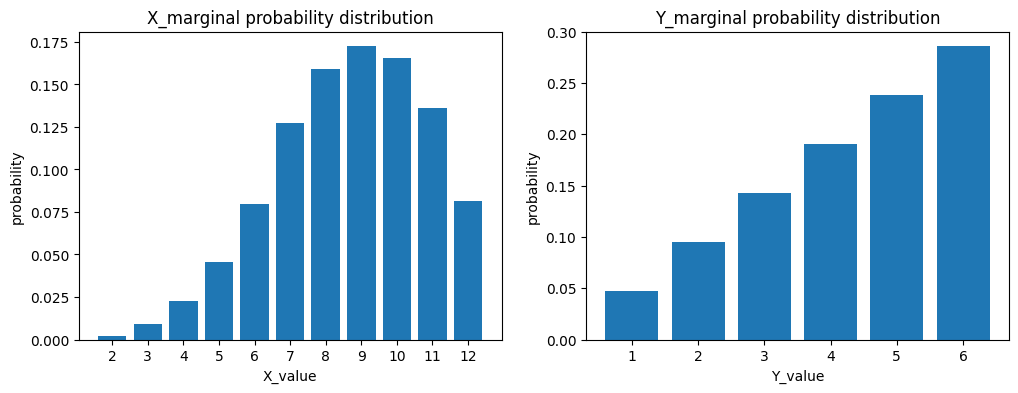

In [36]:
prob_x=np.array([f_X(x_k) for x_k in x_set])
prob_y=np.array([f_Y(y_k) for y_k in y_set])

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title("X_marginal probability distribution")
ax1.set_xlabel("X_value")
ax1.set_ylabel("probability")
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title("Y_marginal probability distribution")
ax2.set_xlabel("Y_value")
ax2.set_ylabel("probability")

plt.show()

In [38]:
print(np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set]))

8.666666666666666


In [39]:
def E(XY,g):
  x_set,y_set,f_XY=XY
  return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [41]:
mean_X=E(XY, lambda x, y:x)
print(mean_X)

8.666666666666666


In [42]:
mean_Y=E(XY,lambda x, y:y)
print(mean_Y)

4.333333333333333


In [43]:
a,b=2,3

In [45]:
print(E(XY,lambda x,y:a*x+b*y))

30.333333333333332


In [47]:
print(a*mean_X+b*mean_Y)

30.333333333333332


In [50]:
print(np.sum([(x_i-mean_X)**2*f_XY(x_i,y_j)for x_i in x_set for y_j in y_set]))

4.444444444444444


In [63]:
def V(XY,g):
  x_set,y_set,f_XY=XY
  mean=E(XY,g)
  return np.sum([(g(x_i,y_j)-mean)**2 *f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [64]:
var_X=V(XY,g=lambda x, y:x)
print(var_X)

4.444444444444444


In [65]:
var_Y=V(XY,g=lambda x,y:y)
print(var_Y)

2.2222222222222223


In [66]:
def Cov(XY):
  x_set,y_set,f_XY=XY
  mean_X=E(XY,lambda x, y:x)
  mean_Y=E(XY, lambda x, y:y)
  return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [68]:
cov_xy=Cov(XY)
print(cov_xy)

2.222222222222222


In [70]:
print(V(XY, lambda x,y:a*x + b*y))

64.44444444444444


In [72]:
print(a**2 * var_X+b**2*var_Y+2*a*b*cov_xy)

64.44444444444443


In [74]:
print(cov_xy/np.sqrt(var_X*var_Y))


0.7071067811865474
